In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [7]:
fg_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')


In [8]:
fg_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
print("Fear & Greed Columns:", fg_df.columns)
print("Trader Data Columns:", trader_df.columns)


Fear & Greed Columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Trader Data Columns: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [15]:

fg_df['date'] = pd.to_datetime(fg_df['date']).dt.date

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [16]:
merged_df = pd.merge(trader_df, fg_df, on='date', how='inner')


In [17]:

merged_df['risk_exposure'] = merged_df['Size Tokens'] * merged_df['Size USD']
merged_df['profit_flag'] = merged_df['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)


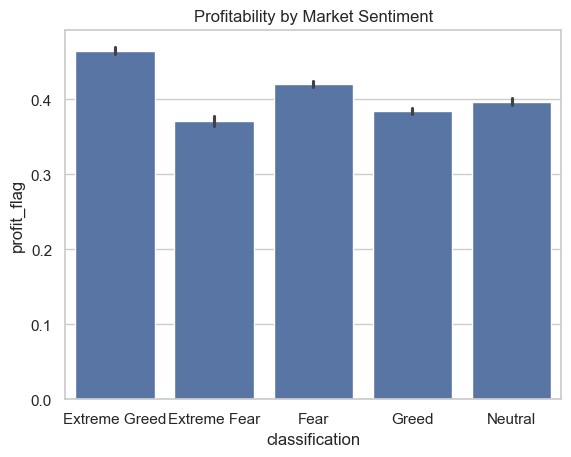

In [18]:
sns.barplot(data=merged_df, x='classification', y='profit_flag')
plt.title("Profitability by Market Sentiment")
plt.show()


In [19]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)


In [20]:

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,risk_exposure,profit_flag
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,7.768799e+06,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2.042880e+03,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,1.657943e+05,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,1.632889e+05,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,6.089175e+02,0


In [21]:

merged_df['risk_exposure'] = merged_df['Size Tokens'] * merged_df['Size USD']

merged_df['profit_flag'] = merged_df['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)


In [22]:

profit_by_sentiment = merged_df.groupby('classification')['profit_flag'].mean().reset_index()

volume_by_sentiment = merged_df.groupby('classification')['Size Tokens'].sum().reset_index()


C:\Users\nj001\AppData\Local\Temp\ipykernel_9048\1875733003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_sentiment, x='classification', y='profit_flag', palette='Set2')


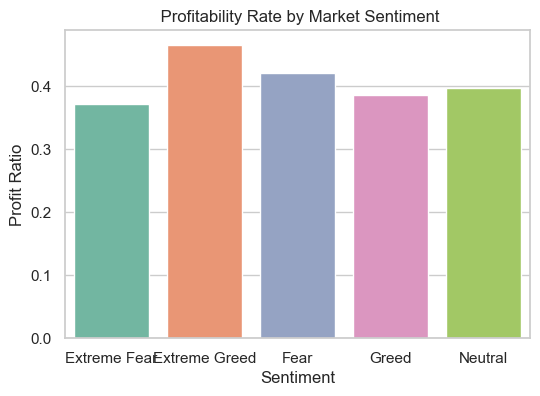

In [28]:
# Profitability bar plot
plt.figure(figsize=(6,4))
sns.barplot(data=profit_by_sentiment, x='classification', y='profit_flag', palette='Set2')
plt.title(" Profitability Rate by Market Sentiment")
plt.ylabel("Profit Ratio")
plt.xlabel("Sentiment")
plt.show()


C:\Users\nj001\AppData\Local\Temp\ipykernel_9048\37051220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='classification', y='Size Tokens', palette='Set3')


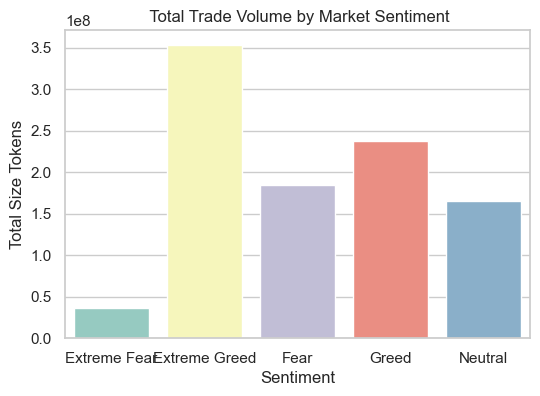

In [29]:
# Volume plot
plt.figure(figsize=(6,4))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size Tokens', palette='Set3')
plt.title(" Total Trade Volume by Market Sentiment")
plt.ylabel("Total Size Tokens")
plt.xlabel("Sentiment")
plt.show()

C:\Users\nj001\AppData\Local\Temp\ipykernel_9048\3556168334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='risk_exposure', palette='coolwarm')


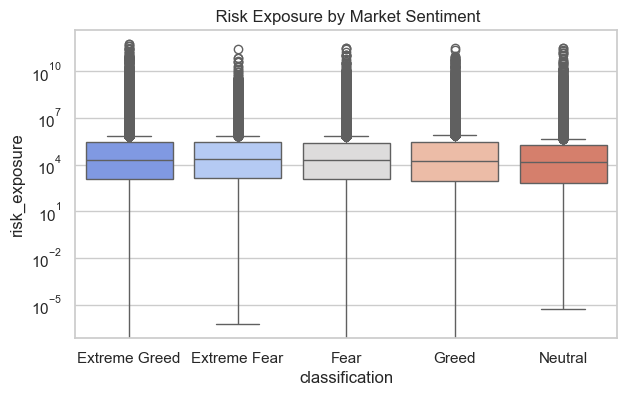

In [30]:
# Risk exposure boxplot
plt.figure(figsize=(7,4))
sns.boxplot(data=merged_df, x='classification', y='risk_exposure', palette='coolwarm')
plt.yscale("log")
plt.title(" Risk Exposure by Market Sentiment")
plt.show()

In [32]:

# Risk Exposure
print(" Average Risk Exposure (Greed):", round(merged_df[merged_df['classification'] == 'Greed']['risk_exposure'].mean(), 2))
print(" Average Risk Exposure (Fear):", round(merged_df[merged_df['classification'] == 'Fear']['risk_exposure'].mean(), 2))

# Profit Rate
print(" Profit Rate (Greed):", round(profit_by_sentiment[profit_by_sentiment['classification'] == 'Greed']['profit_flag'].values[0], 2))
print(" Profit Rate (Fear):", round(profit_by_sentiment[profit_by_sentiment['classification'] == 'Fear']['profit_flag'].values[0], 2))

# Total Volume
print(" Total Volume (Greed):", int(volume_by_sentiment[volume_by_sentiment['classification'] == 'Greed']['Size Tokens'].values[0]))
print(" Total Volume (Fear):", int(volume_by_sentiment[volume_by_sentiment['classification'] == 'Fear']['Size Tokens'].values[0]))


 Average Risk Exposure (Greed): 51729698.78
 Average Risk Exposure (Fear): 43855802.95
 Profit Rate (Greed): 0.38
 Profit Rate (Fear): 0.42
 Total Volume (Greed): 237195132
 Total Volume (Fear): 185055993
